## Importar Librerias

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import re

## Cargar la Data

In [2]:
#### cargar la data de label
df = pd.read_csv('../data/output_train.csv', dtype='str')
df = df[df.date_year!='0']
#### filtar el campo date_year cuyo valor es 21
img_21 = list(df[df.date_year=='21'].id)
#### filtar el campo date_year cuyo valor es 2021
img_2021 = list(df[df.date_year=='2021'].id)

In [3]:
#### definir la ruta donde se encuentran las imagenes de los años
path = '../data/output/image_train_transform/fecha/upscaling/digitos/year/'
train = []
y_train = []
id_train = []
### cargar la imagenes,asociando y_train igual a 1 a las imagenes "21" y 0  las imagenes "2021" 
for i in img_21:
    try:
        img = cv2.imread(path+str(i)+'.jpg')
        img = img[:40,:]
        img = cv2.resize(img,(28,28))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        train.append(gray.ravel())
        y_train.append(1)
        id_train.append(i)
    except Exception as e:
        print(e)
        pass
for i in img_2021:
    try:
        img = cv2.imread(path+str(i)+'.jpg')
        img = img[:40,:]
        img = cv2.resize(img,(28,28))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        train.append(gray.ravel())
        y_train.append(0)
        id_train.append(i)

    except:
        pass

## Normalización

In [4]:
### convertir en numpy trnaro el train, como el y_train
train = np.array(train)
y_train = np.array(y_train)
train.shape, y_train.shape

((222, 784), (222,))

In [5]:
#### normalizar la data de entrenamiento
train = train/255.0

In [6]:
### entrenar el cluster kmean para visualizar los datos
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k).fit(train)

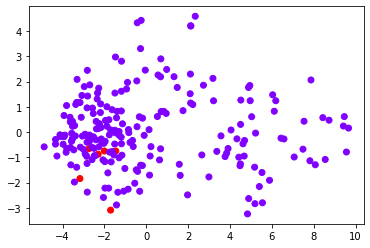

In [7]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
data_pca = pca.fit_transform(train)
plt.scatter(data_pca[:,0],data_pca[:,1],c = y_train, cmap = 'rainbow')
plt.show()

In [8]:
### convetir en pandas dataframen los datos, asignando su index el id de la imagen
train = pd.DataFrame(train, index = id_train)
y_train = pd.Series(y_train, index = id_train)
train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
C_74,0.474510,0.482353,0.482353,0.474510,0.486275,0.501961,0.533333,0.568627,0.580392,0.556863,...,0.607843,0.607843,0.611765,0.600000,0.588235,0.603922,0.603922,0.603922,0.600000,0.600000
C_295,0.494118,0.509804,0.533333,0.592157,0.639216,0.615686,0.580392,0.549020,0.529412,0.521569,...,0.890196,0.858824,0.831373,0.850980,0.890196,0.901961,0.898039,0.909804,0.901961,0.890196
C_18,0.298039,0.313725,0.317647,0.305882,0.313725,0.345098,0.364706,0.356863,0.325490,0.317647,...,0.533333,0.619608,0.749020,0.788235,0.788235,0.800000,0.796078,0.792157,0.796078,0.800000
C_33,0.360784,0.447059,0.600000,0.549020,0.470588,0.419608,0.380392,0.376471,0.411765,0.466667,...,0.780392,0.784314,0.776471,0.756863,0.752941,0.760784,0.772549,0.776471,0.780392,0.784314
C_22,0.517647,0.635294,0.709804,0.741176,0.733333,0.698039,0.682353,0.682353,0.682353,0.666667,...,0.643137,0.549020,0.513725,0.572549,0.639216,0.658824,0.674510,0.682353,0.678431,0.682353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_104,0.356863,0.392157,0.372549,0.349020,0.305882,0.262745,0.349020,0.392157,0.329412,0.423529,...,0.427451,0.407843,0.396078,0.431373,0.435294,0.423529,0.423529,0.427451,0.439216,0.435294
C_150,0.403922,0.380392,0.368627,0.396078,0.443137,0.439216,0.419608,0.333333,0.325490,0.396078,...,0.278431,0.286275,0.258824,0.239216,0.231373,0.247059,0.247059,0.282353,0.262745,0.270588
C_271,0.607843,0.572549,0.525490,0.486275,0.458824,0.431373,0.443137,0.388235,0.286275,0.313725,...,0.607843,0.678431,0.619608,0.725490,0.843137,0.917647,0.933333,0.956863,0.937255,0.913725
C_349,0.933333,0.945098,0.941176,0.921569,0.929412,0.917647,0.917647,0.901961,0.941176,0.937255,...,0.698039,0.835294,0.847059,0.964706,0.768627,0.176471,0.368627,0.980392,0.960784,0.984314


## Entrenamiento del Modelo

In [9]:
from sklearn import svm
clf = svm.SVC(probability=True,  class_weight="balanced" , random_state = 42)
clf.fit(train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

## Guardar Modelo

In [10]:
import pickle
pickle.dump(clf, open('../models/model_svm_clasificacion_annio.pkl', mode='wb'))